<a href="https://colab.research.google.com/github/Anaghamb/TASK-1/blob/main/Number_Recognition_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUILDING A CNN NUMBER RECOGNITION MODEL ON MNIST DATA
###### ANAGHA M BASHEER 2148120



# OBJECTIVE:-

To build a CNN model IMAGE PREDICTOR with the rectified linear unit on MNIST dataset.


# DATA DESCRIPTION:-

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.


### IMPORTING THE REQUIRED PACKAGES

In [ ]:
#IMPORTING REQUIRED PACKAGES
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### LOADING THE DATASET AND SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [ ]:
#define number of classes and size of the input images
num_classes = 10
input_shape = (28, 28, 1) #1 is for black and white image

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### BUILDING THE CNN MODEL

In [ ]:
cnn_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

cnn_model.summary()

batch_size = 128
epochs = 2

cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


score = cnn_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### PREDICTION BASED ON THE TEST DATA

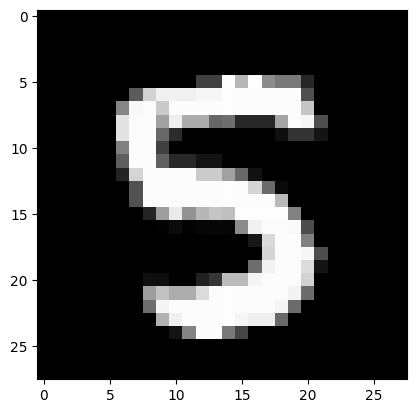

1/1 [==============================] - 0s 151ms/step
[0 0 0 0 0 1 0 0 0 0]
Predicted digit 5


In [ ]:
#TO PREDICT THE 120TH IMAGE IN THE TEST DATASET

import pylab as plt
plt.imshow(x_test[120:121].reshape(28,28),cmap='gray')
plt.show()

import numpy as np
prediction=cnn_model.predict(x_test[120:121])

thresholded=(prediction>0.2)*1
print(thresholded[0])
print('Predicted digit',np.where(thresholded==1)[1][0])

# INTERPRETATION:-
The MNIST dataset has been splitted in to train and test data and sacled the images into [0,1] range. Then the CNN model has been developed to predict the number in the image using the train dataset. After the developing the model, the model accuracy has been checked using the test adat and obtained as 0.98 and also the 120th image has been predicted correctly as 5 by the developed CNN model.